In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import fiona

In [2]:
fiona.supported_drivers['KML'] = 'rw'

In [3]:
gdf = gpd.read_file('./On-street Parking Bays.geojson')

In [4]:
gdf

,rd_seg_id,marker_id,bay_id,meter_id,rd_seg_dsc,last_edit,geometry
0,20194,4497W,9590,572B,King Street between Lonsdale Street and Little...,20201208140823,"MULTIPOLYGON (((144.95463 -37.81425, 144.95461..."
1,20194,4457W,9585,572B,King Street between Lonsdale Street and Little...,20201208140823,"MULTIPOLYGON (((144.95450 -37.81396, 144.95447..."
2,20194,4461W,9583,572B,King Street between Lonsdale Street and Little...,20201208140822,"MULTIPOLYGON (((144.95445 -37.81385, 144.95443..."
3,20194,4499W,9589,572B,King Street between Lonsdale Street and Little...,20201208140823,"MULTIPOLYGON (((144.95461 -37.81420, 144.95458..."
4,20194,4453W,9587,572B,King Street between Lonsdale Street and Little...,20201208140823,"MULTIPOLYGON (((144.95456 -37.81409, 144.95453..."
...,...,...,...,...,...,...,...
24710,21557,12803S,10289,None,Pelham Street between Drummond Street and Lygo...,20201208140902,"MULTIPOLYGON (((144.96697 -37.80295, 144.96697..."
24711,21341,None,4832,None,Abbotsford Street between Miller Street and Vi...,20201223122247,"MULTIPOLYGON (((144.94521 -37.80512, 144.94520..."
24712,21987,15056E,15215,None,Charles Street between Jolimont Street and Pal...,20201223122253,"MULTIPOLYGON (((144.98121 -37.81770, 144.98120..."
24713,21739,None,6977,None,Altona Street between Ormond Street and Kensin...,20201223122251,"MULTIPOLYGON (((144.92470 -37.79617, 144.92472..."


<AxesSubplot:>

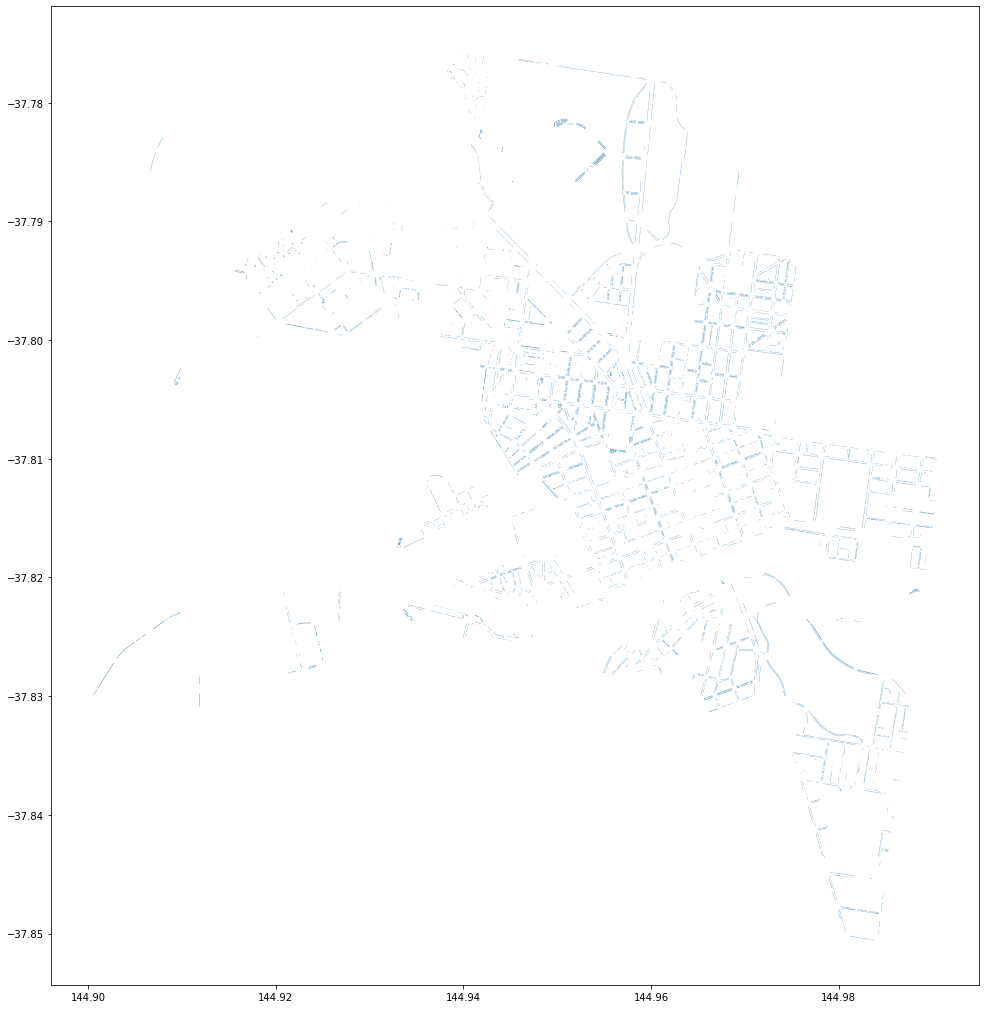

In [5]:
gdf.plot(figsize=(18, 18), alpha = 1)